In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: P0932190801PNS003SRSPEC0001.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  8.836e-02 +/- 3.443e-03 (86.8 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-41
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 8721 sec
 Using fit statistic: chi
 Using Background File                P0932190801PNS003BGSPEC0001.FTZ
  Background Exposure Time: 8721 sec
 Using Response (RMF) File            epn_e3_ff20_sdY7.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0932190801PNS003SRCARF0001.FTZ



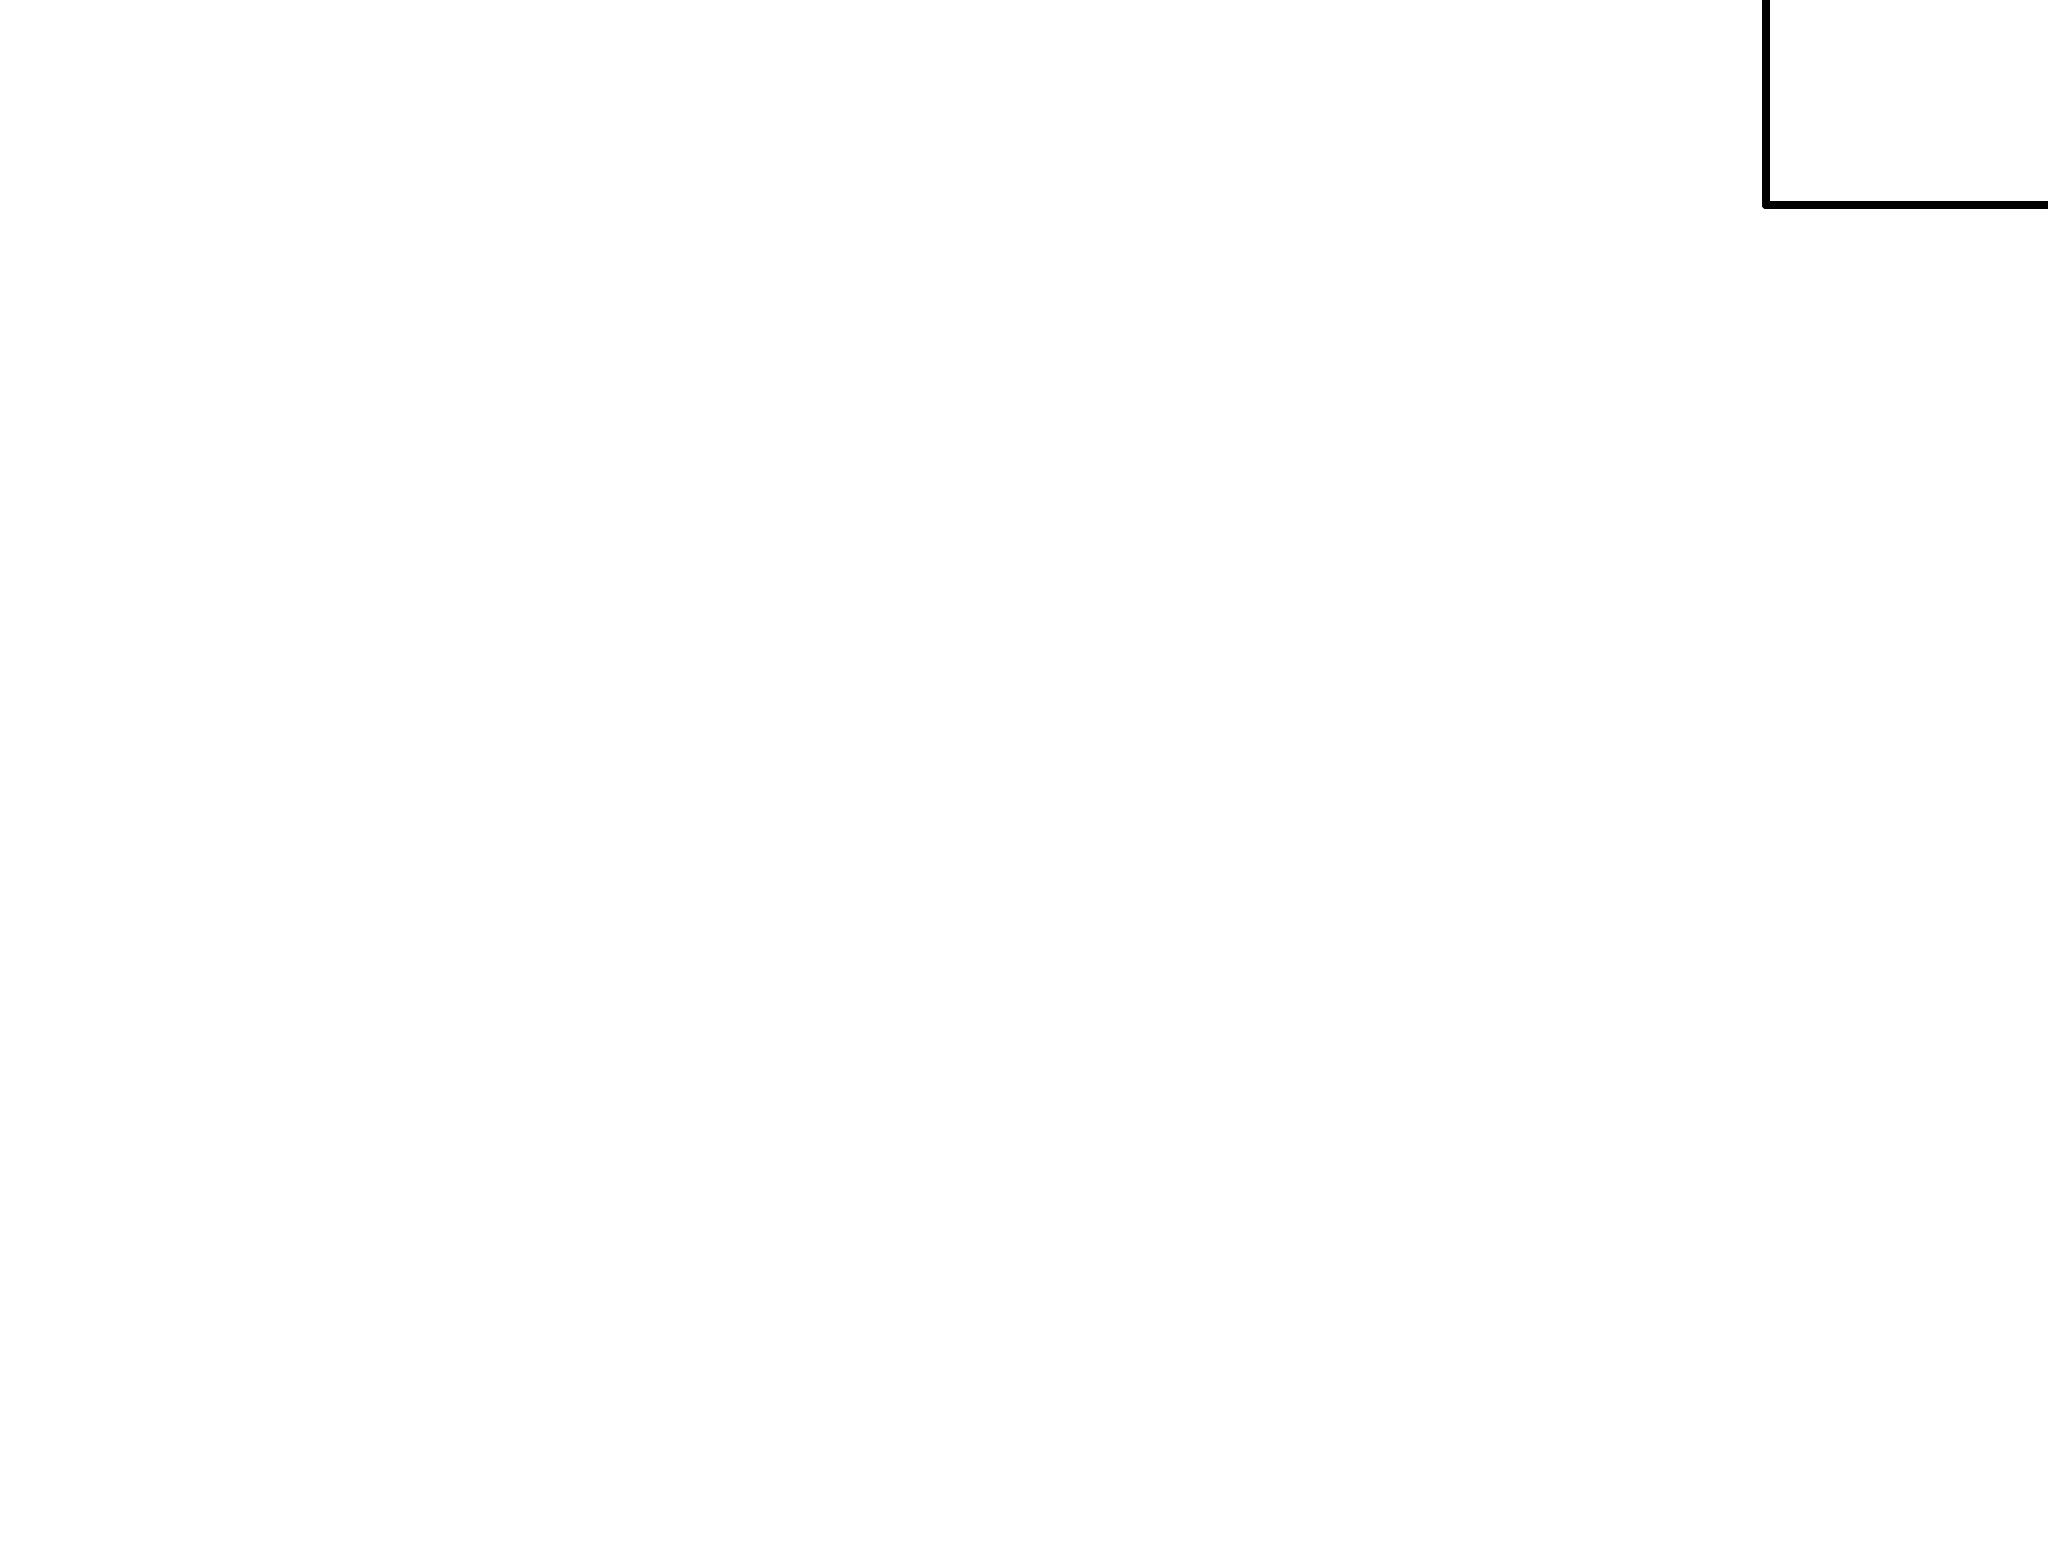

In [2]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.0001 0.05")
Plot("data")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              1.444891e+11     using 41 bins.

Te

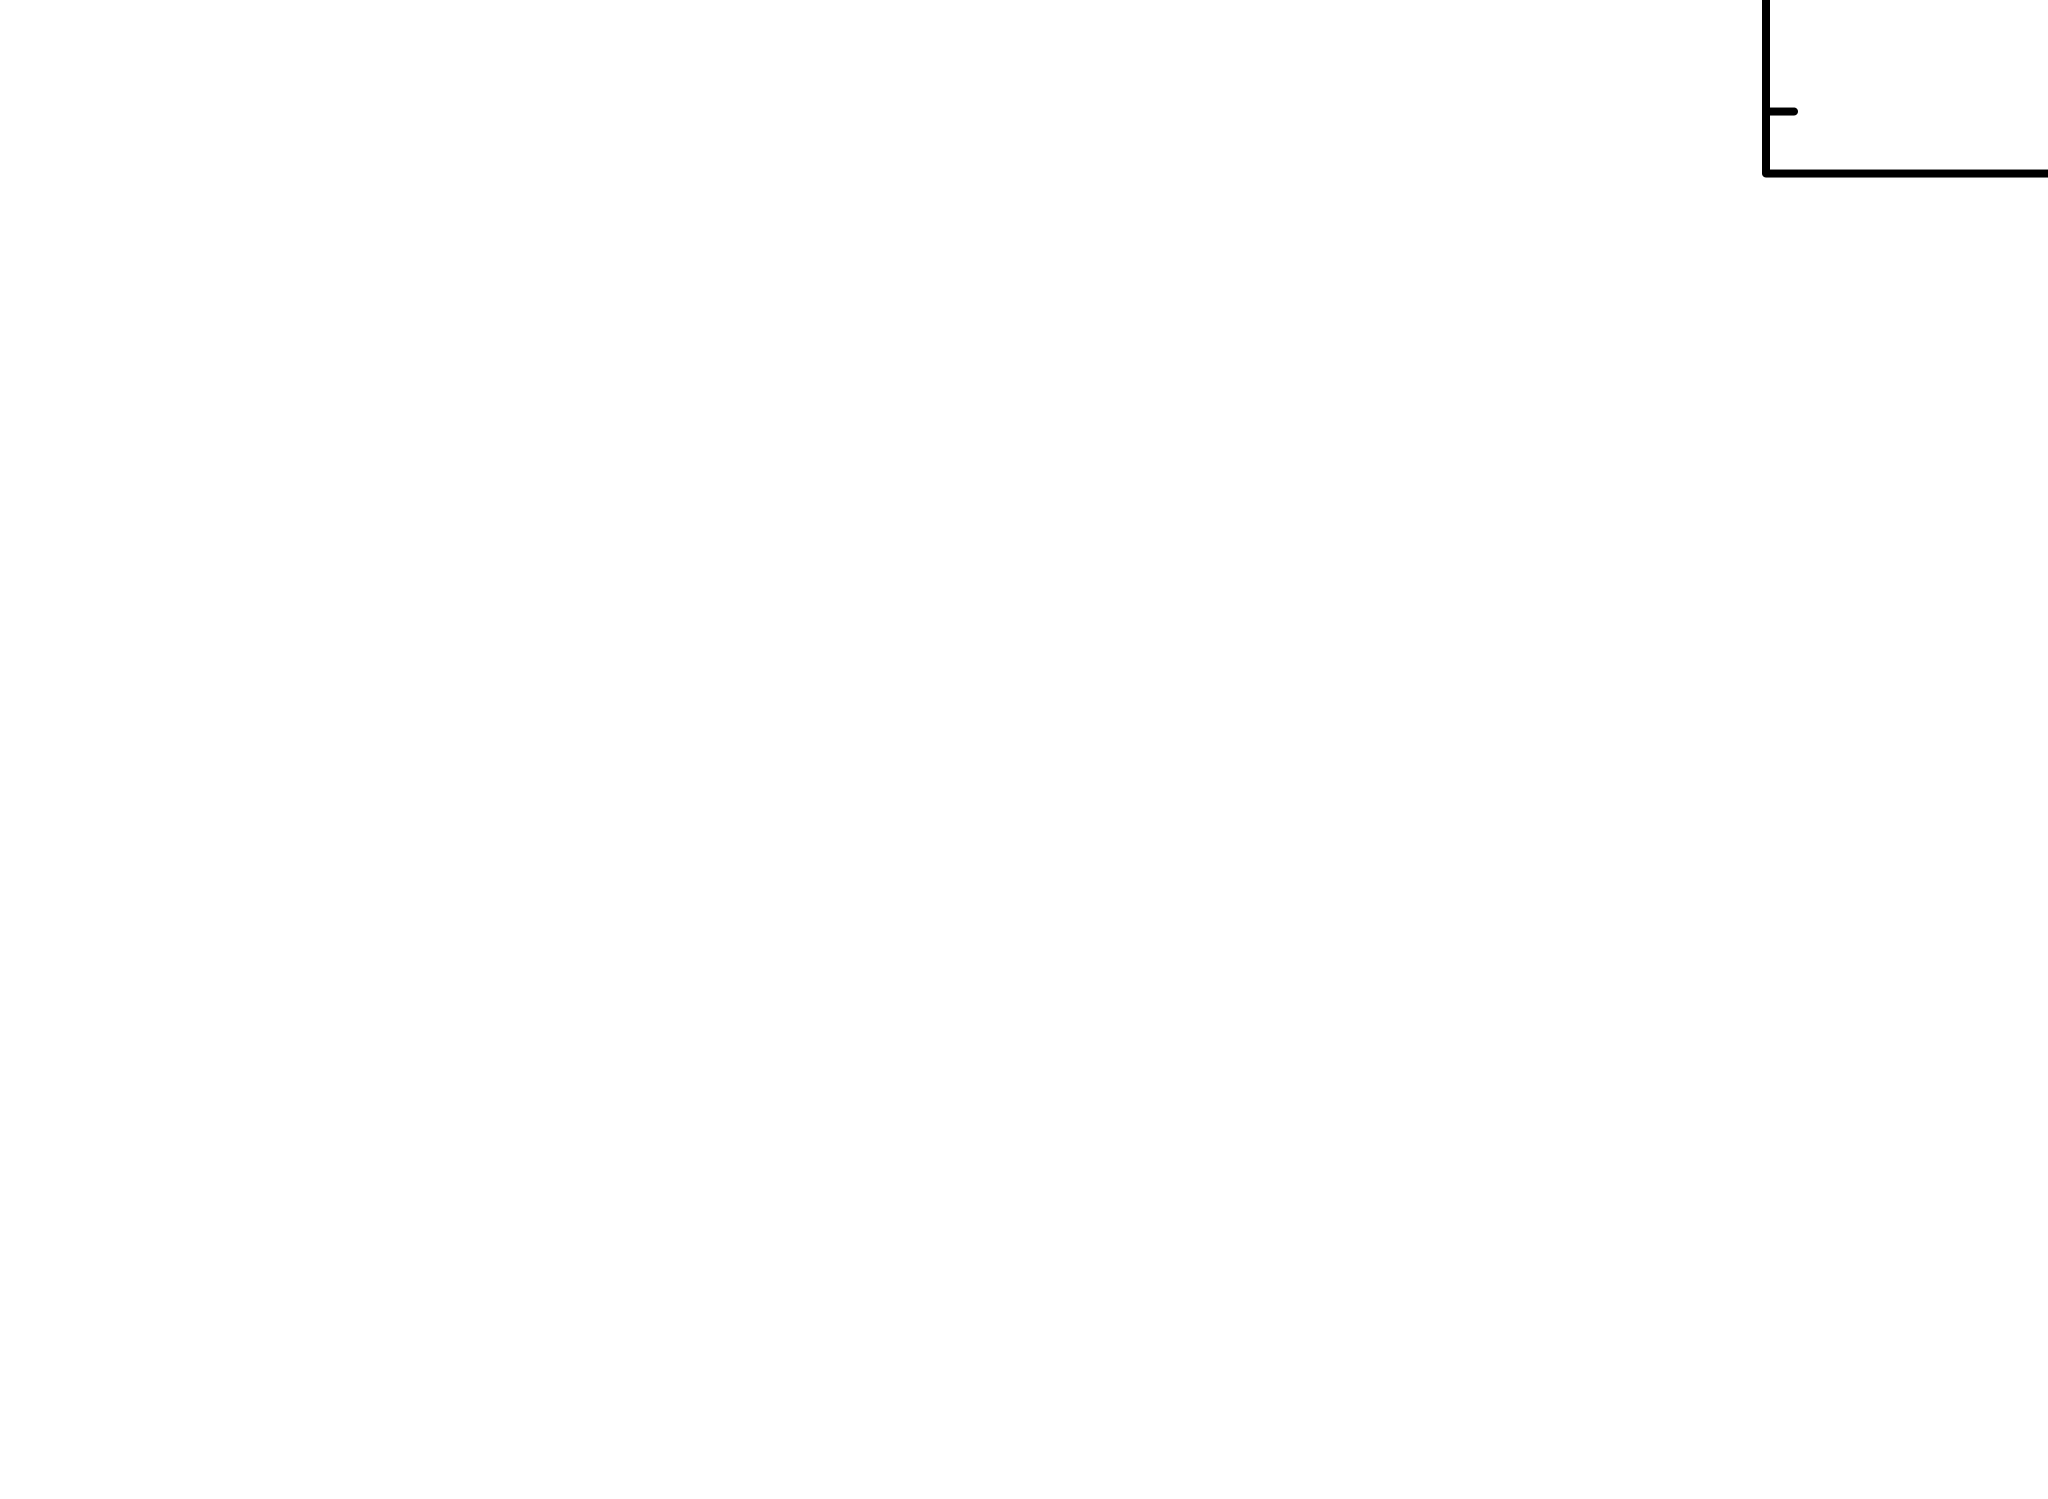

In [3]:
#spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

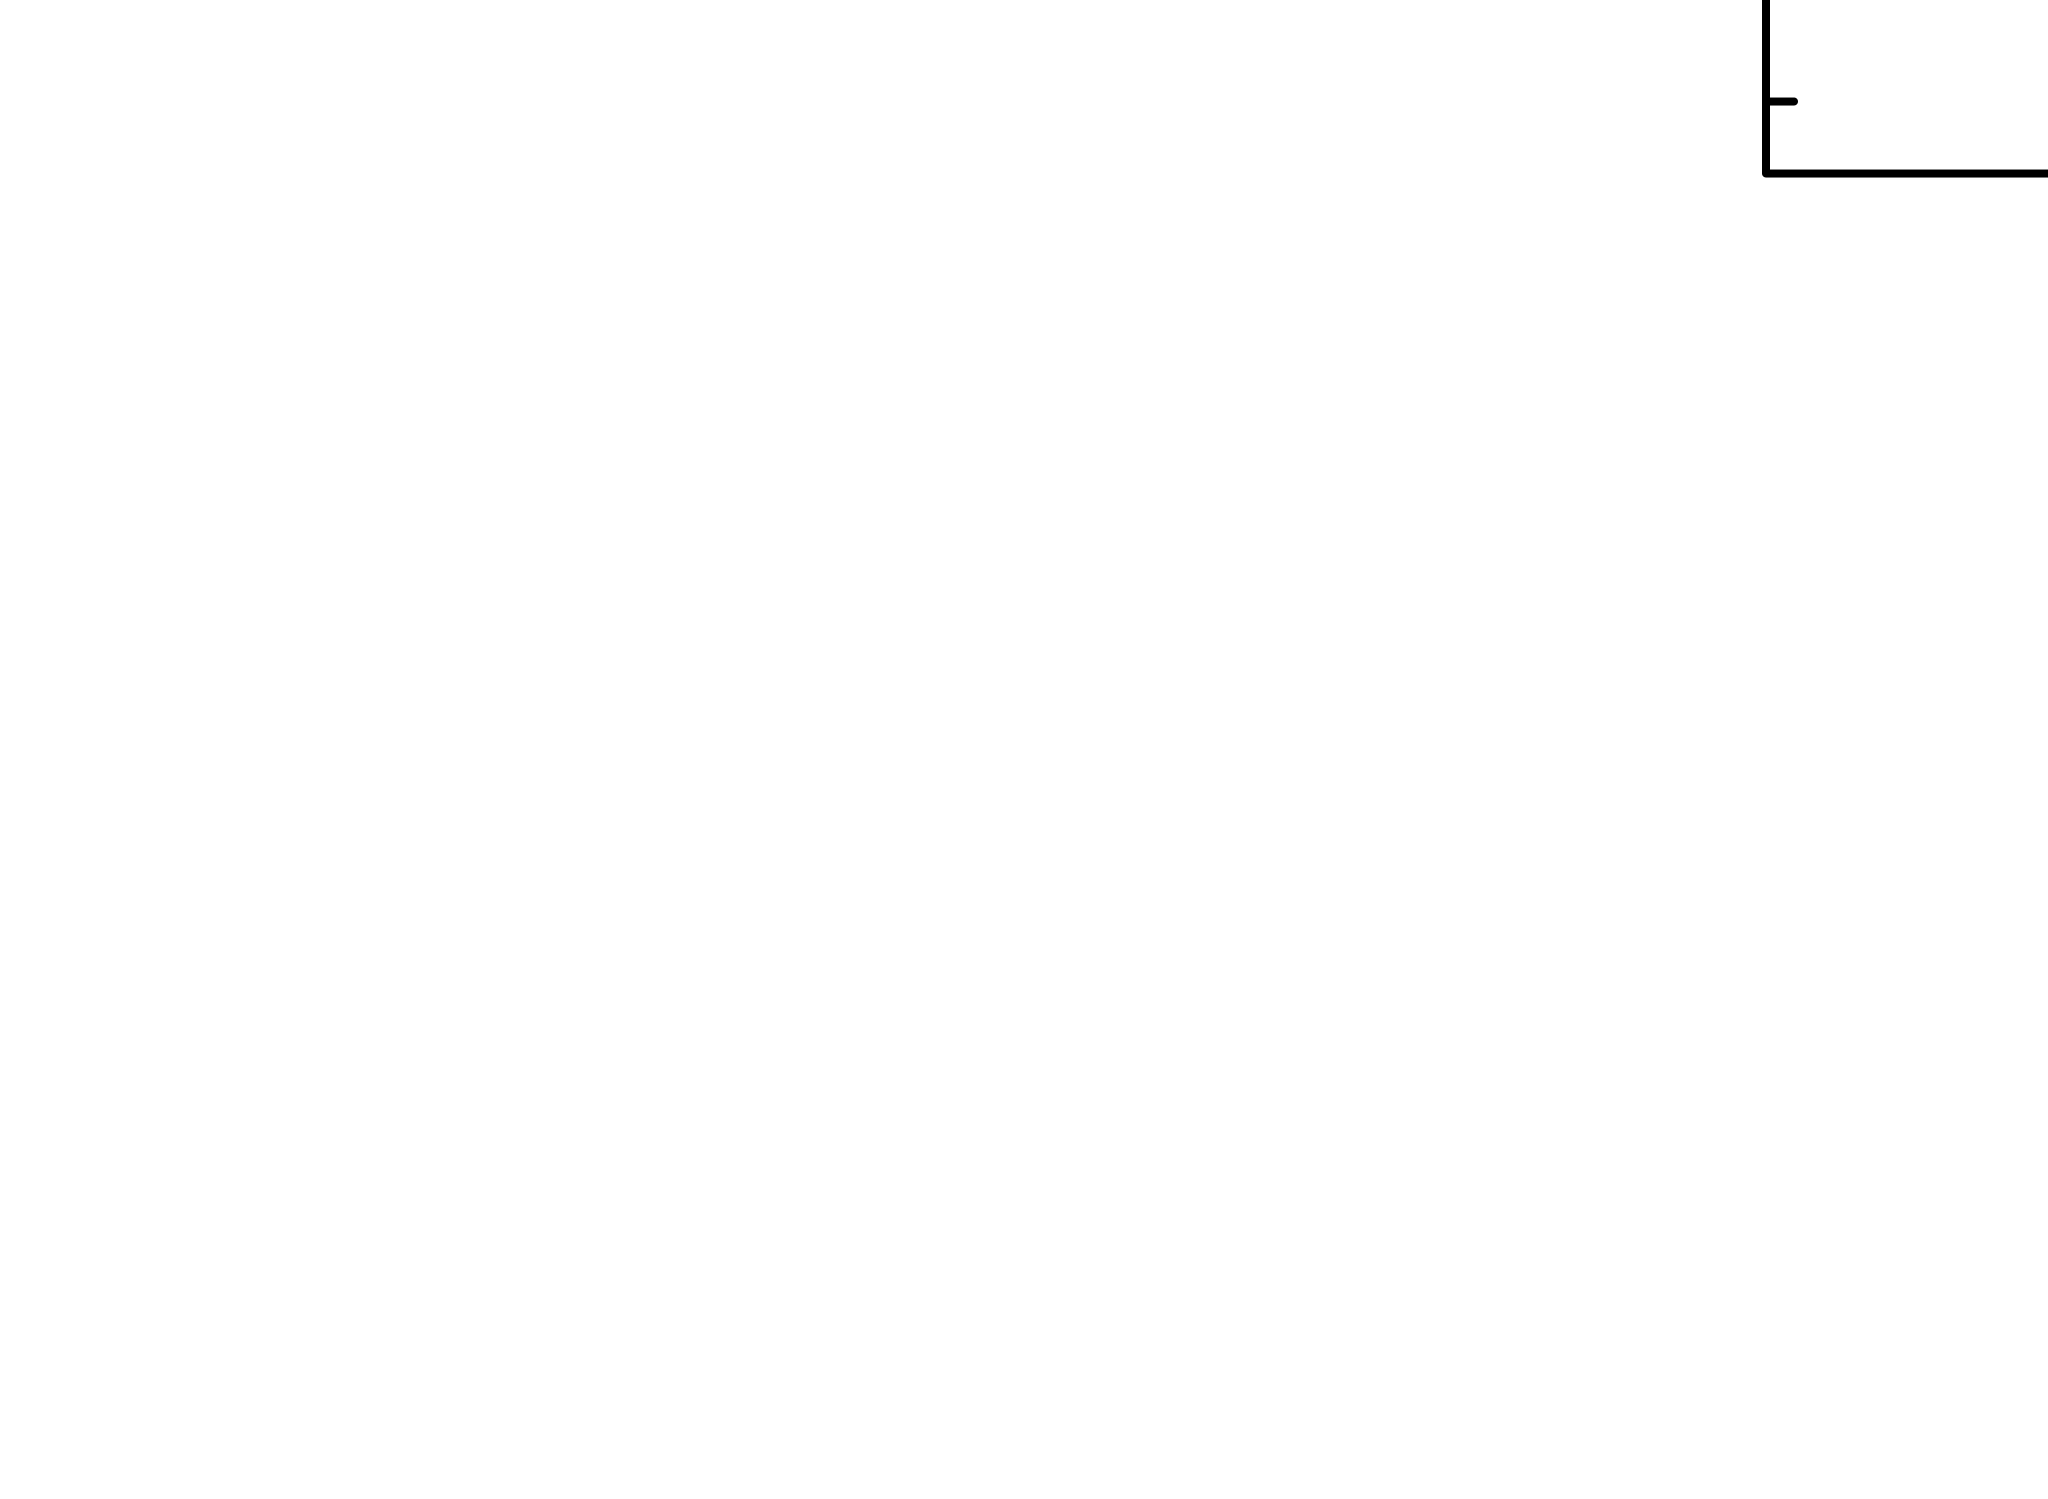


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.001386e+11     using 41 bins.

Test statistic : Chi-Squared              1.001386e+11     using 41 bins.
 Null hypothesis probability of 0.000000e+00 with 38 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
473.553      23.4306      -2      0.350501      -1.04925   1.70494e-06
299.609      1.8157e+07   -1       3.47889      -1.30480   4.81252e-06
296.085      9.85845e+06  -2       5.84273     -0.423166   1.25946e-0

In [4]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.763729e+10     using 41 bins.

Test statistic : Chi-Squared              2.763729e+10     using 41 bins.
 Null hypothesis probability of 0.000000e+00 with 38 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
680.217      5.15913       0       1.44774       153.651   1.99163e-05
585.465      186625       -1       17.2907       10.5208   0.000194383
306.76       96784.4      -2       30.1128       189.849    0.00148934


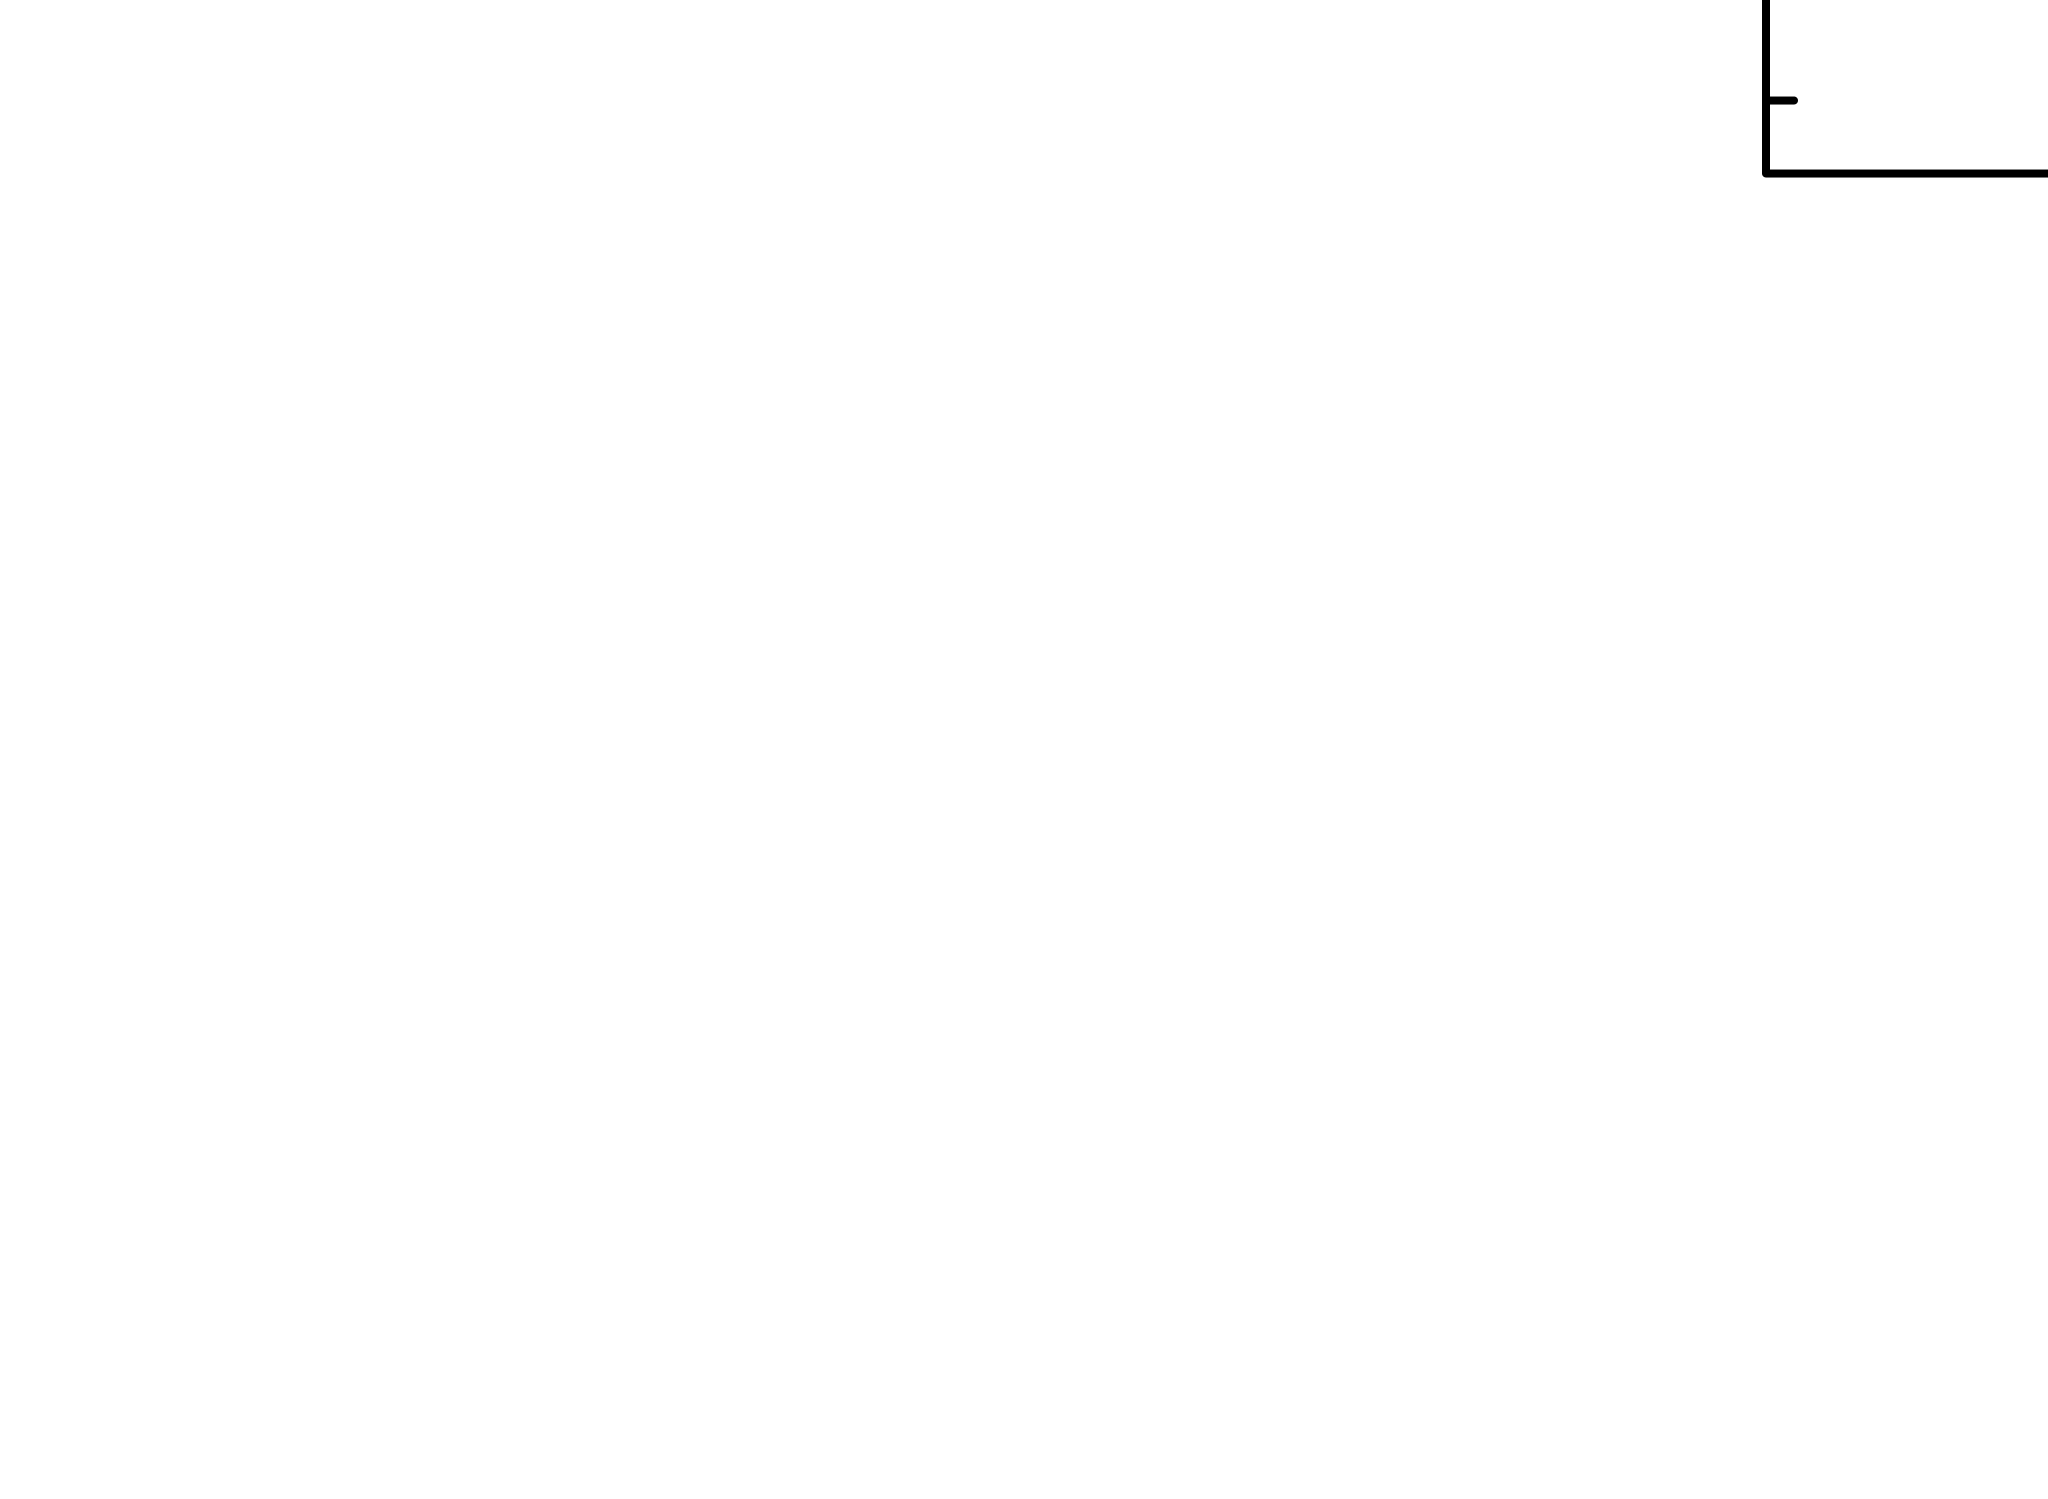

In [5]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

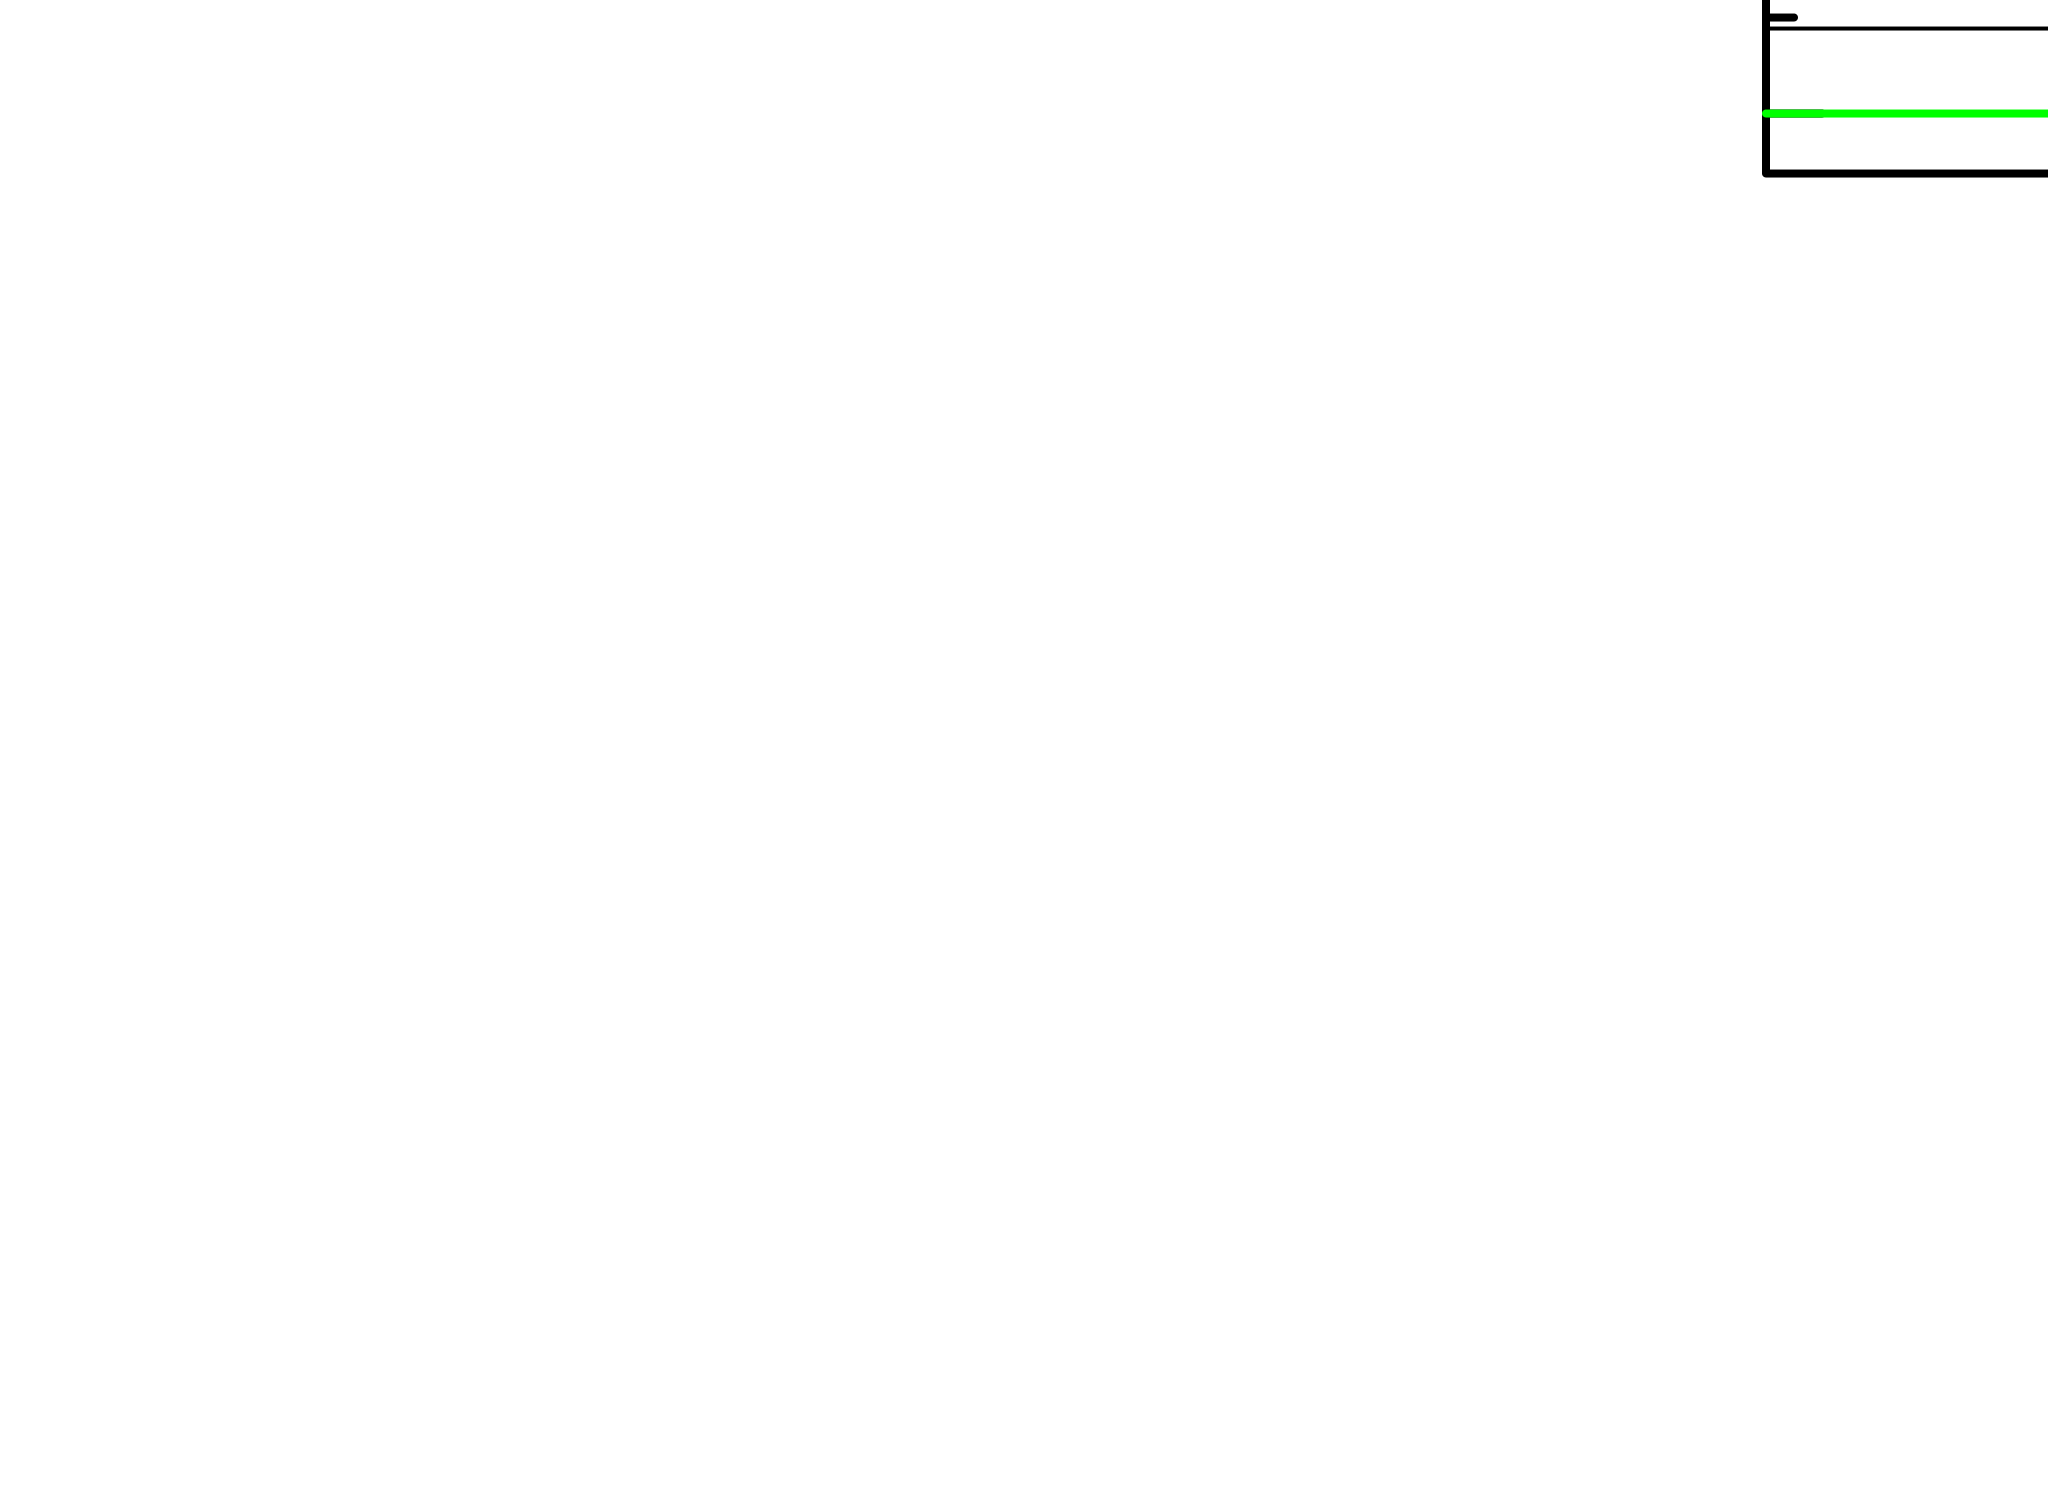


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.332825e+10     using 41 bins.

Test statistic : Chi-Squared              1.332825e+10     using 41 bins.
 Null hypothesis probability of 0.000000e+00 with 38 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
 Due to zero model norms, the following fit parameters are 

In [6]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.509888e+11     using 41 bins.

Test statistic : Chi-Squared              4.509888e+11     using 41 bins.
 Null hypothesis probability of 0.000000e+00 with 36 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.094849e+13     using 41 bins.

Test statistic : Chi-Squared              1.094849e+13     using 41 bins.
 Null hypothesis

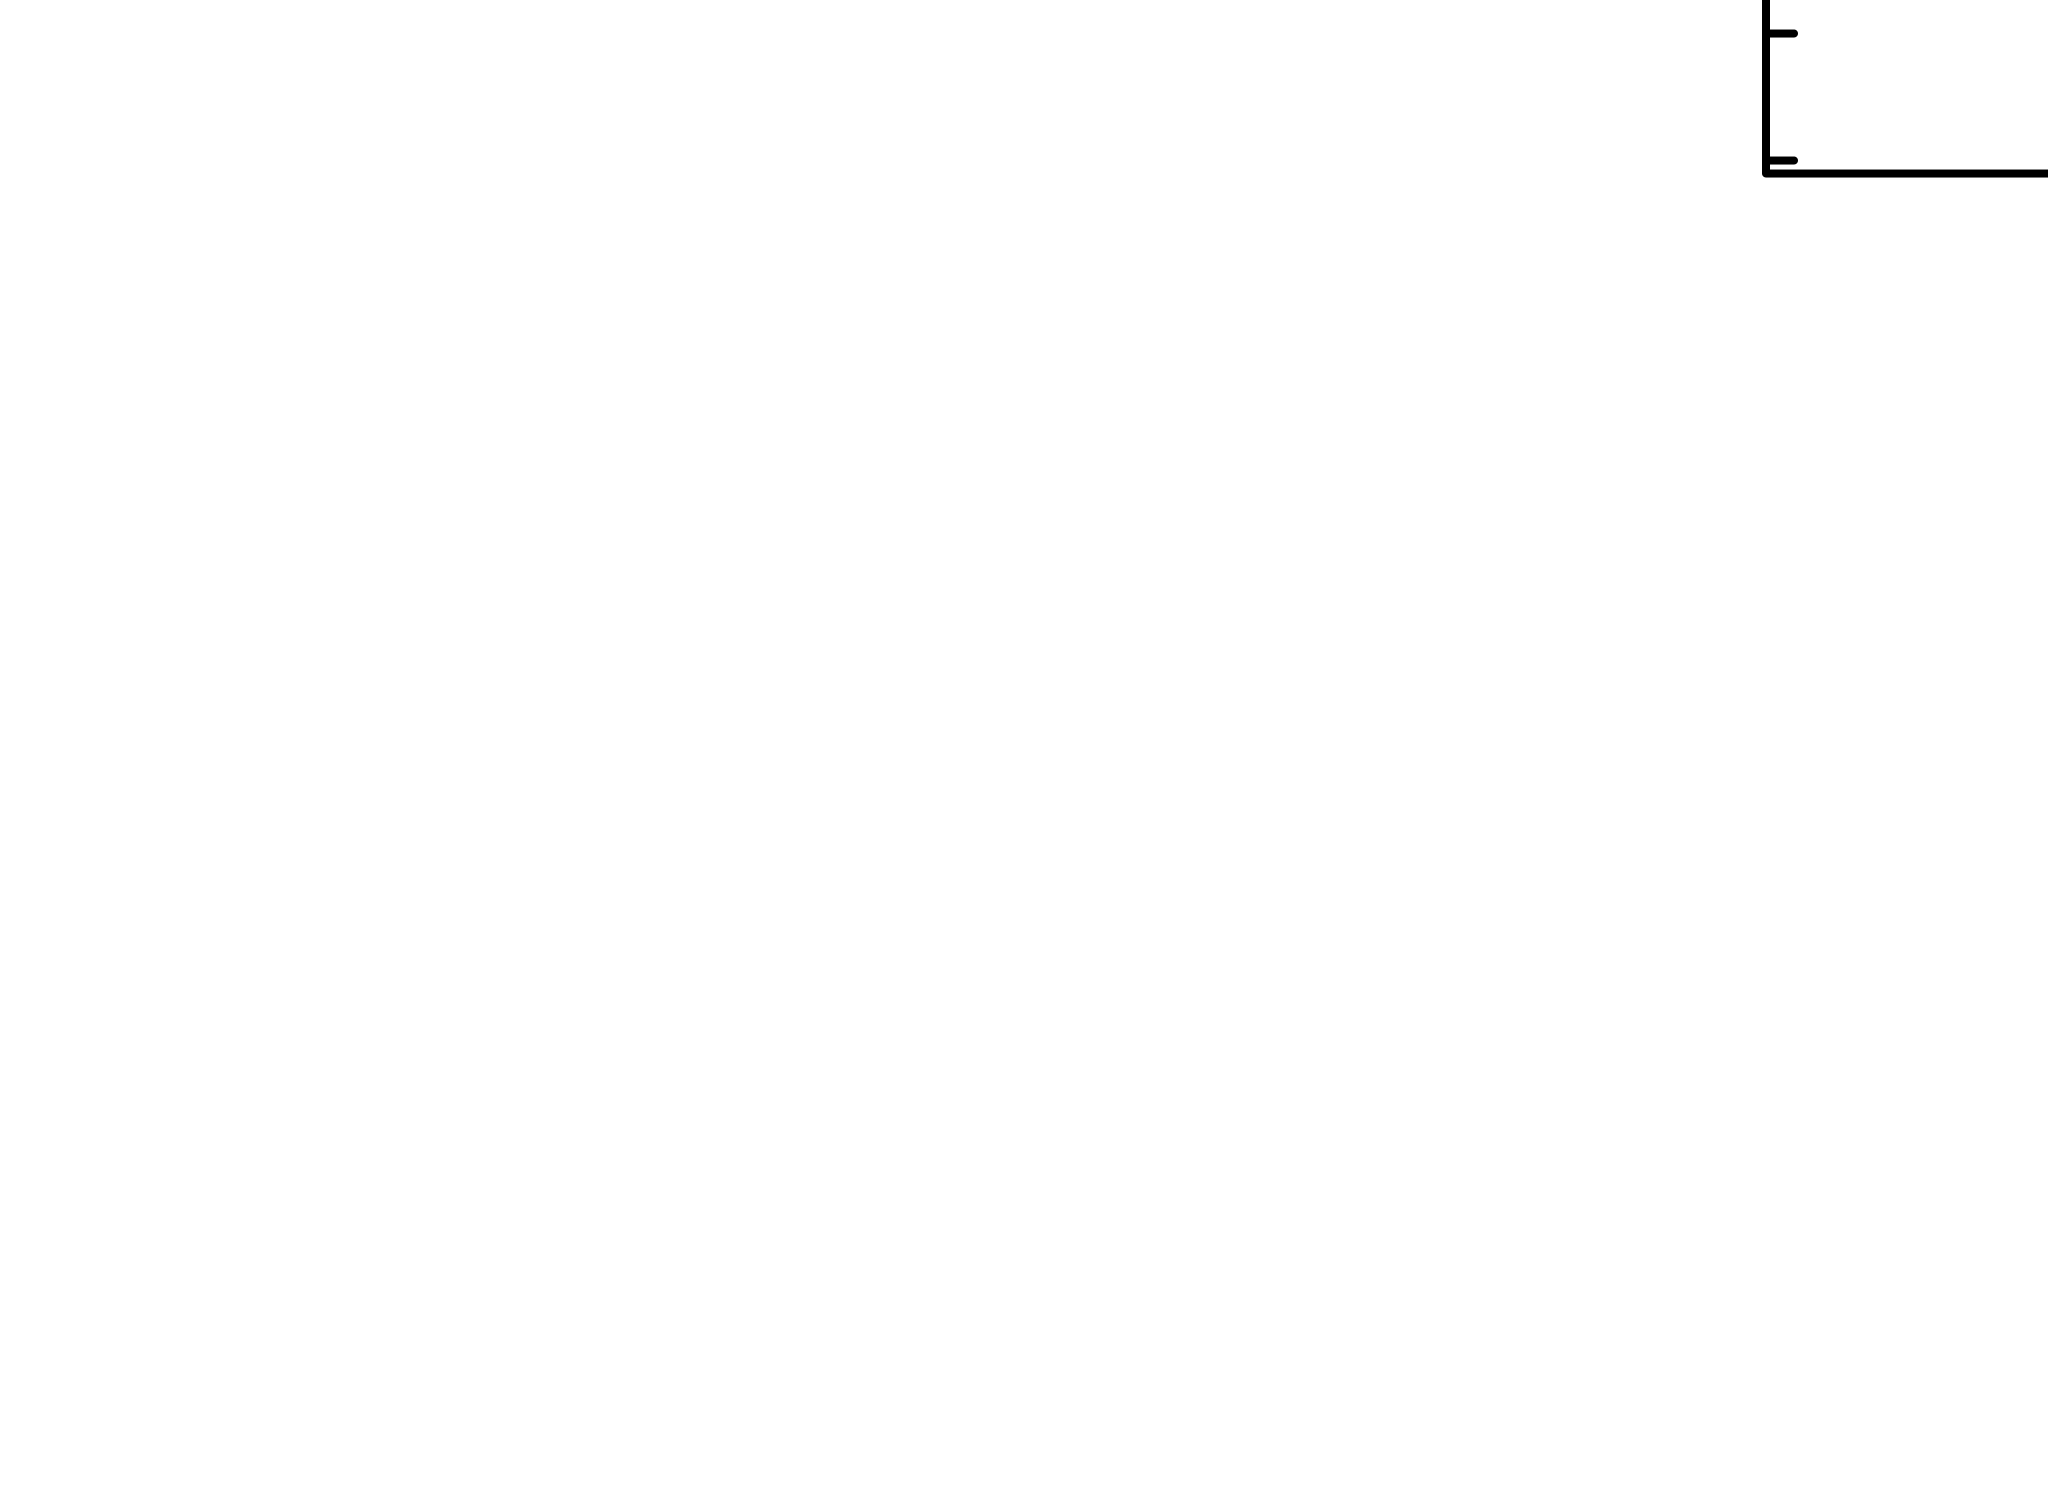

1.59567e-06
69.7575      3627.68      -2       14.4518       2.00716   8.95724e-05     -0.211837   2.04812e-06
69.755       3892.78      -2       14.4469       2.01052   8.95522e-05    -0.0883030   2.66878e-06
69.7523      3472.43      -2       14.4507       2.01163   8.93534e-05     0.0169821   3.47056e-06
69.7495      2913.06      -2       14.4630       2.01093   8.90154e-05      0.106346   4.46528e-06
69.7466      2429.66      -2       14.4794       2.00944   8.86023e-05      0.184222   5.65306e-06
69.7436      2049.18      -2       14.5005       2.00721   8.81256e-05      0.251978   7.03600e-06
69.7406      1742.38      -2       14.5254       2.00441   8.75966e-05      0.310967   8.61013e-06
69.7376      1491.15      -2       14.5512       2.00165   8.70580e-05      0.364299   1.03634e-05
69.7346      1305.88      -2       14.5799       1.99862   8.64967e-05      0.411844   1.22942e-05
69.7316      1142.77      -2       14.6105       1.99540   8.59157e-05      0.454359   1.43938e-0

In [7]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
mo.bbody.kT = 1.0
mo.powerlaw.PhoIndex = 2.0
Fit.perform()
Plot("data resid")


Model TBabs<1>(bbody<2> + gaussian<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   gaussian   LineE      keV      6.50000      +/-  0.0          
   5    3   gaussian   Sigma      keV      0.100000     +/-  0.0          
   6    3   gaussian   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.361787e+11     using 41 bins.

Test statistic : Chi-Squared              2.361787e+11     using 41 bins.
 Null hypothesis probability of 0.000000e+00 with 35 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.984620e+11     using 41 bins.

Test statistic 

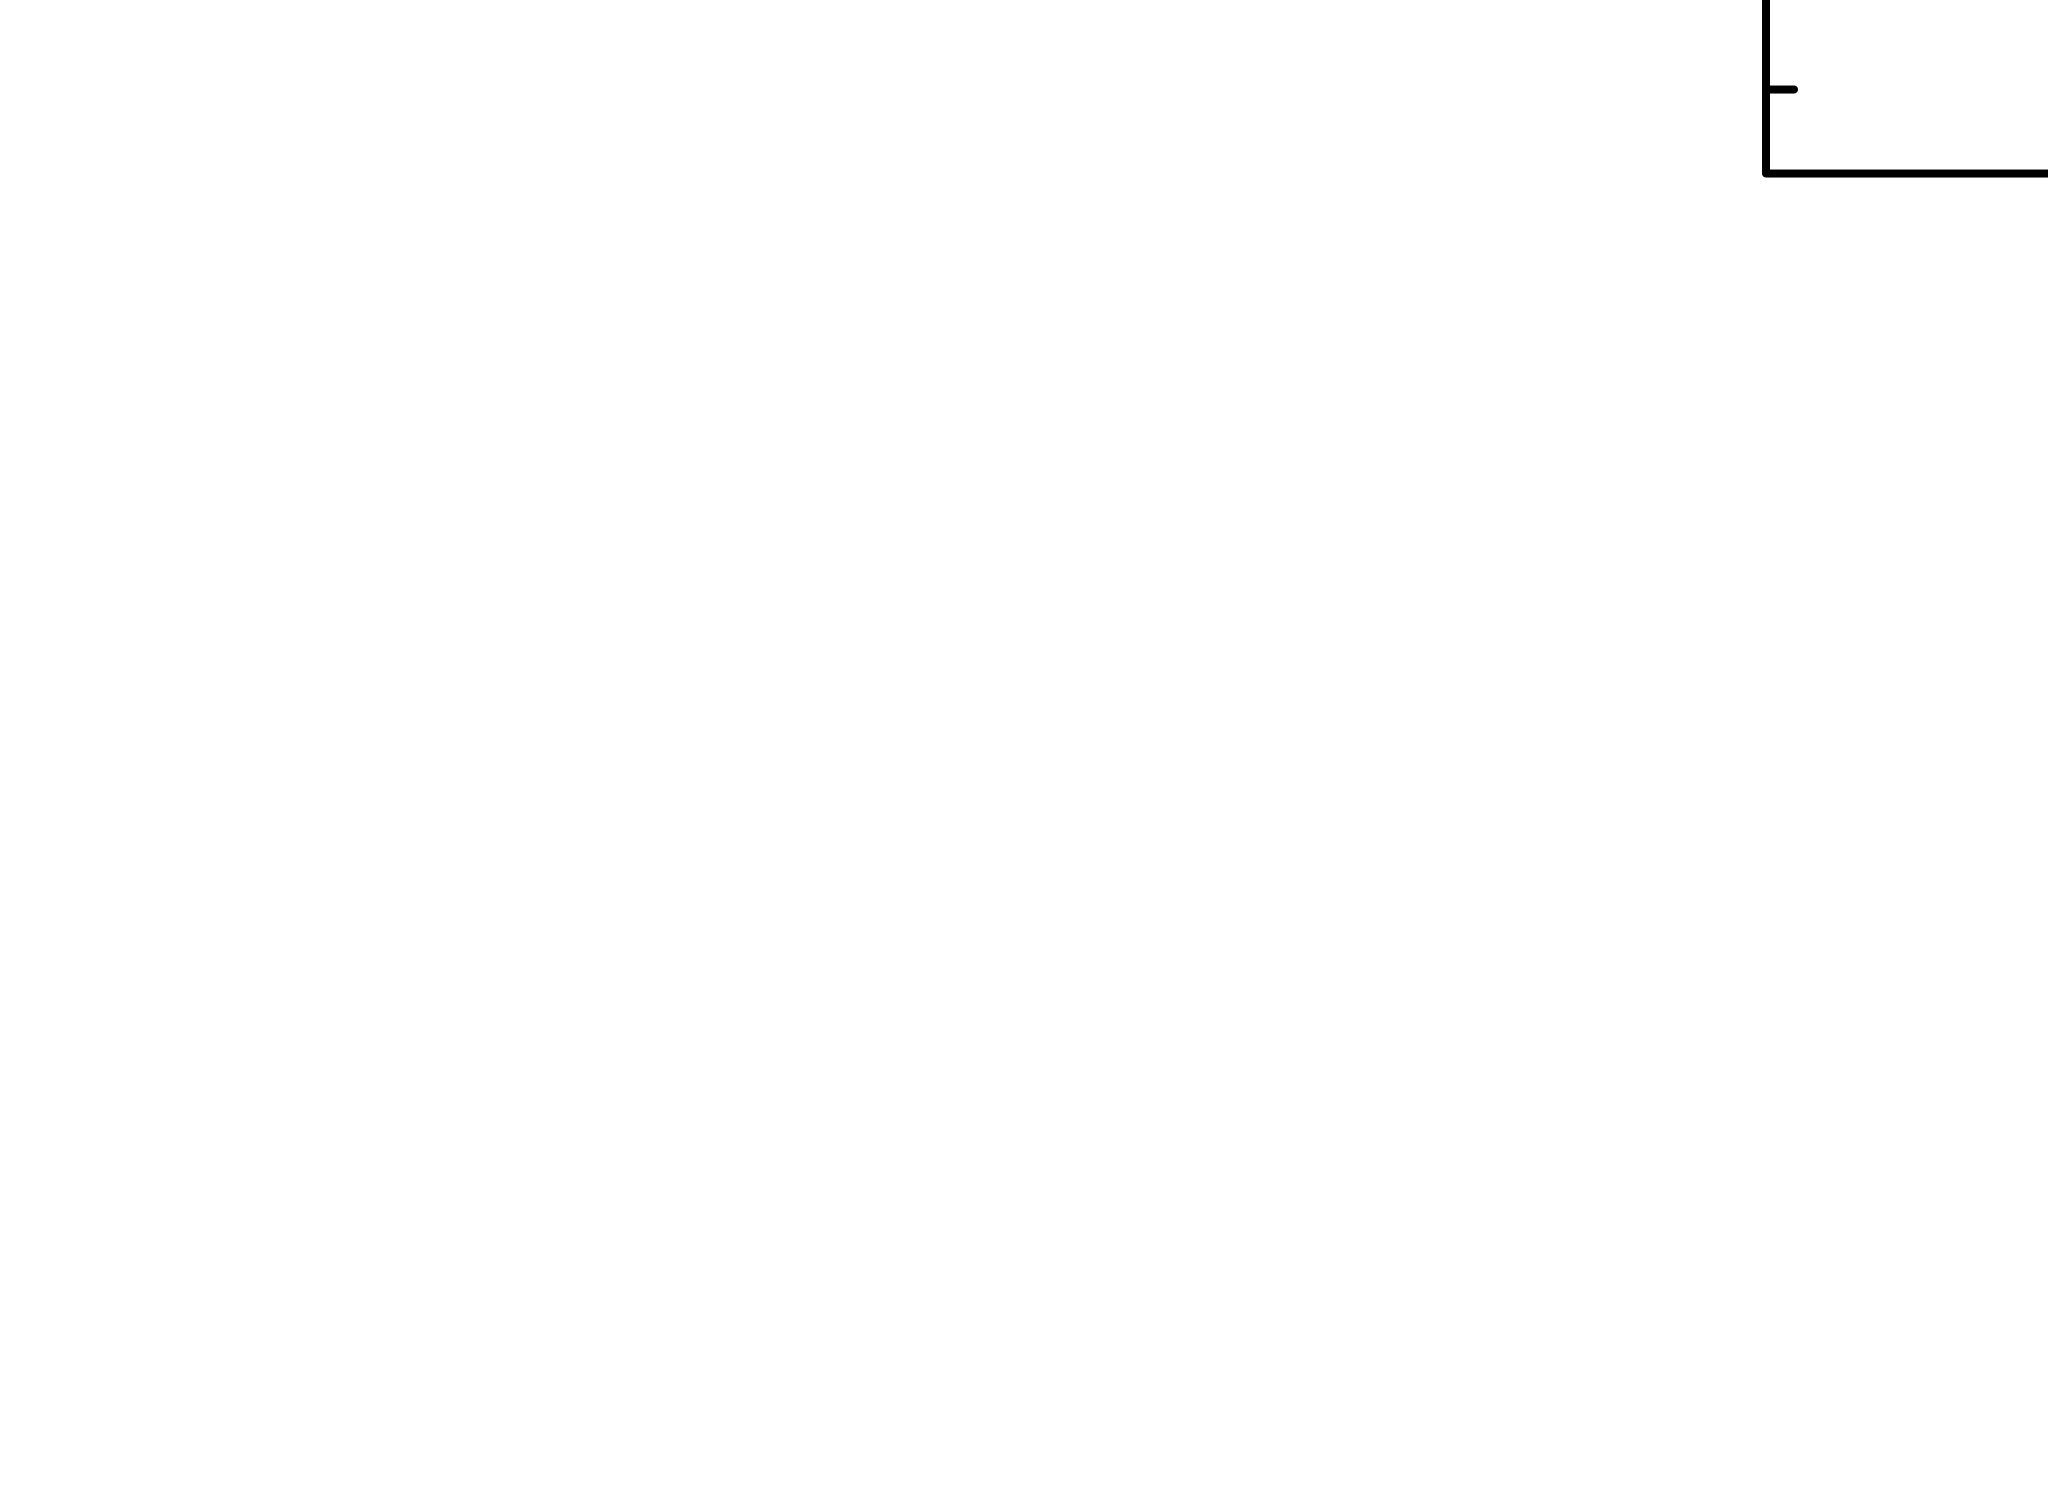

In [8]:
AllModels.clear()
mo = Model("tbabs*(bbody+gaussian)")
mo.gaussian.LineE = 6.7
mo.gaussian.LineE.frozen = True
Fit.perform()
Plot("data resid")

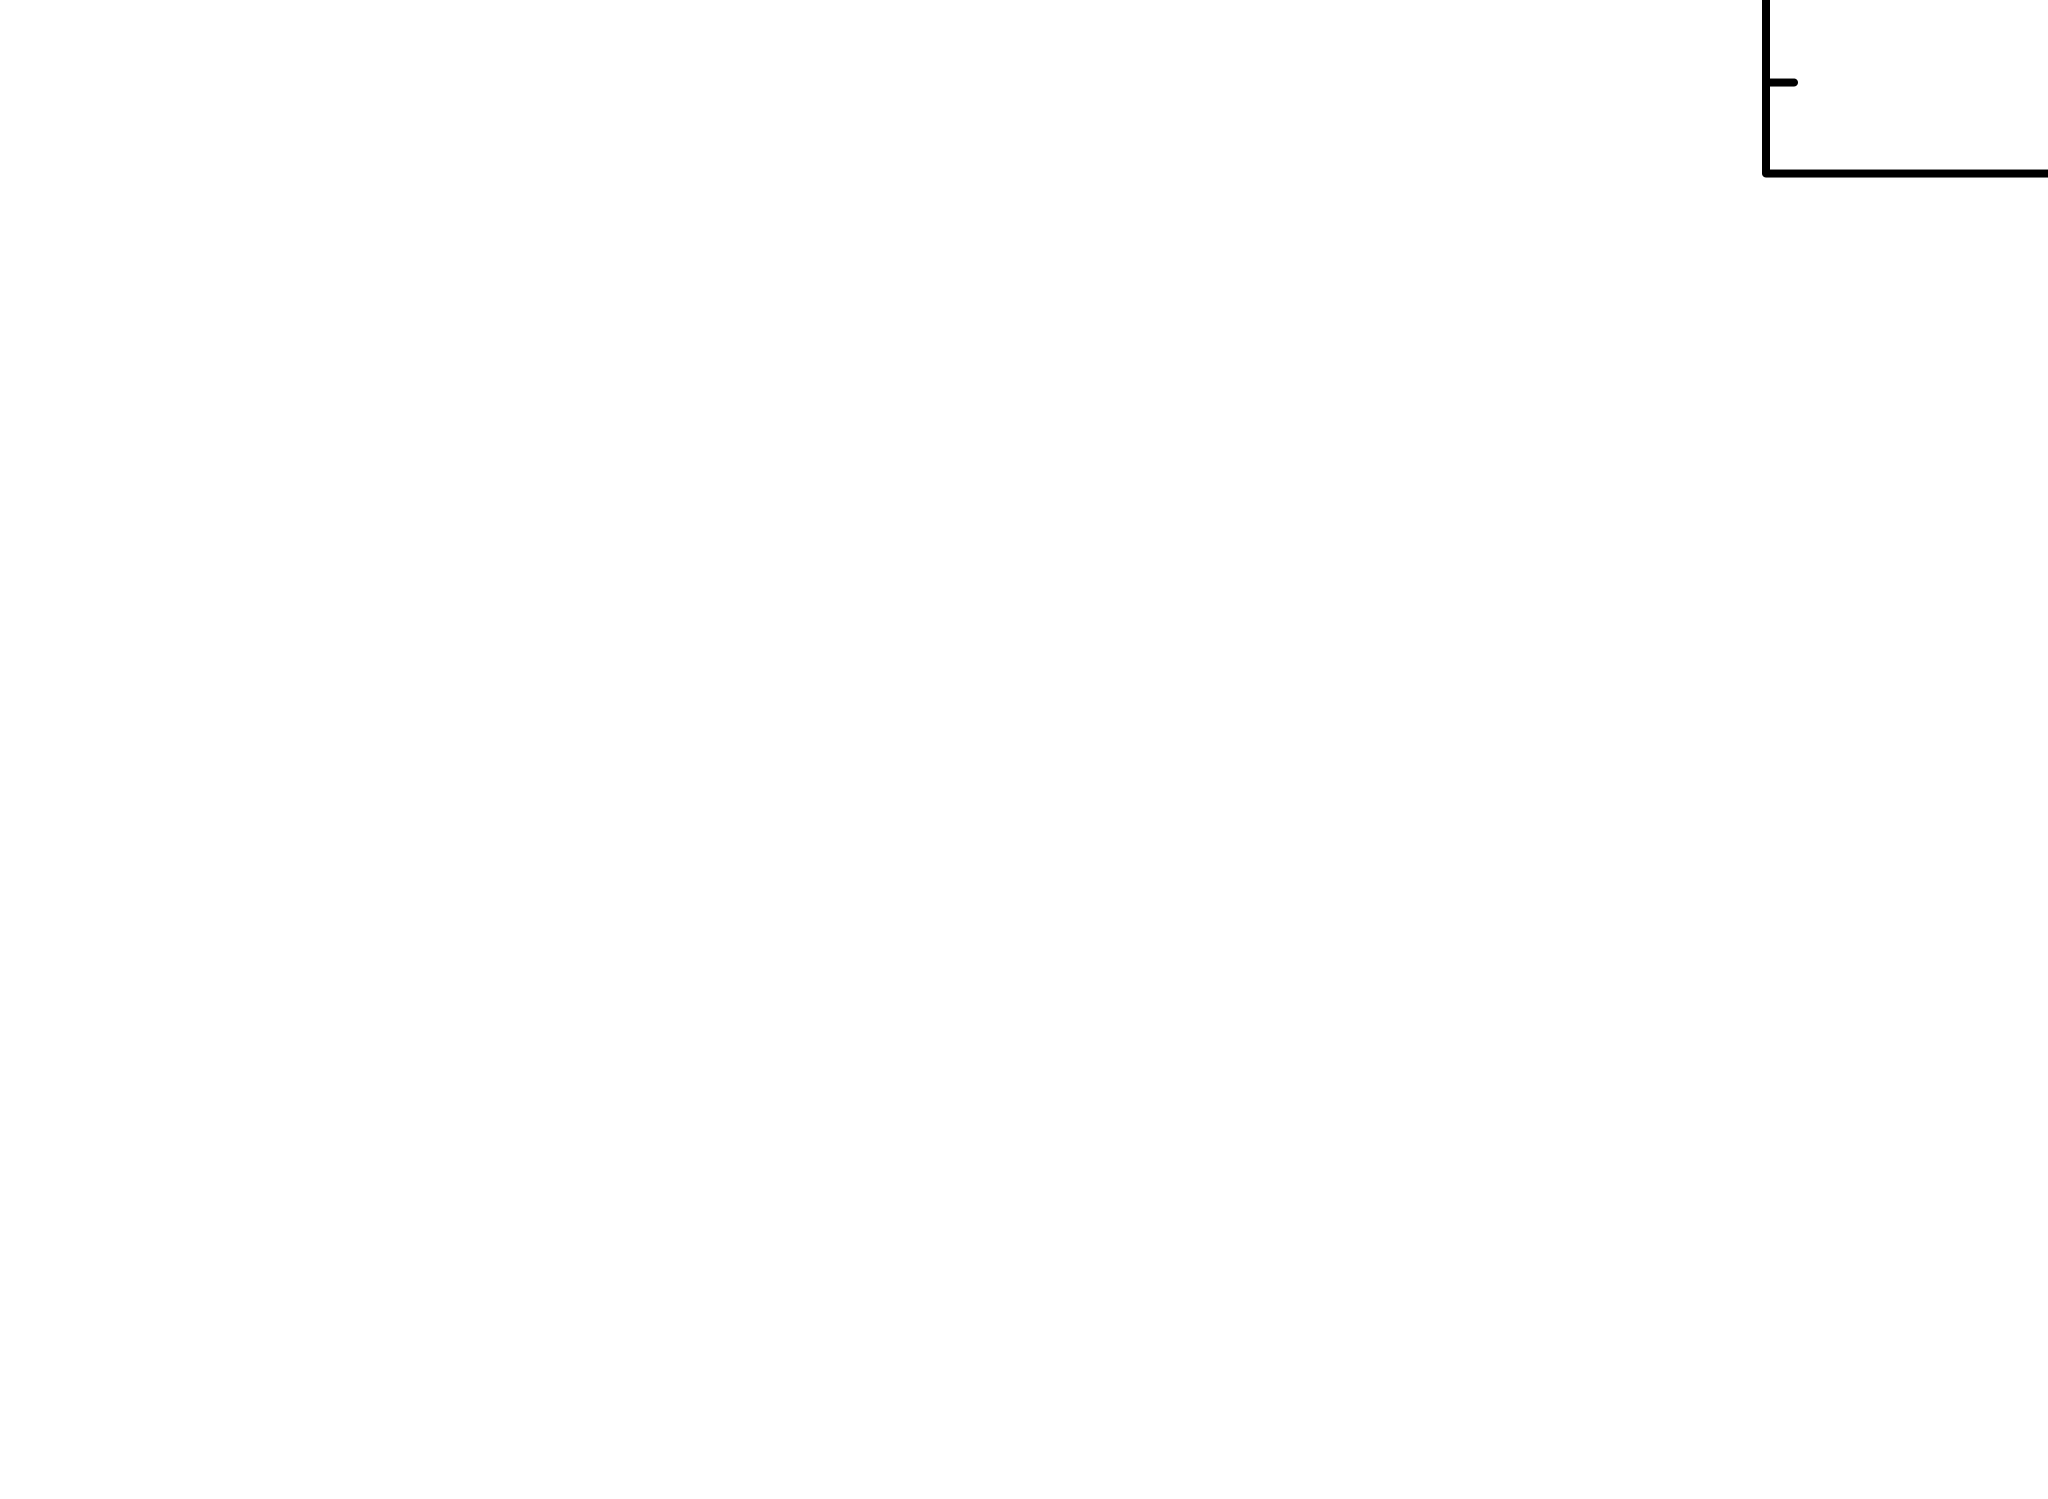


Model TBabs<1>(powerlaw<2> + gaussian<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
   4    3   gaussian   LineE      keV      6.50000      +/-  0.0          
   5    3   gaussian   Sigma      keV      0.100000     +/-  0.0          
   6    3   gaussian   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.677842e+11     using 41 bins.

Test statistic : Chi-Squared              1.677842e+11     using 41 bins.
 Null hypothesis probability of 0.000000e+00 with 35 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.396366e+11     using 41 bins.

Test statist

In [9]:
AllModels.clear()
mo = Model("tbabs*(powerlaw+gaussian)")
mo.gaussian.LineE = 6.7
mo.gaussian.LineE.frozen = True
Fit.perform()
Plot("data resid")

In [10]:
AllModels.calcFlux(".2 12.0")

 Model Flux 0.00038349 photons (4.2773e-12 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [11]:
#plx = 1.4843
d_kpc = 8
F_x = 4.7217*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

3.614596693110989e+33


In [12]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

8
33.55805984693411


In [13]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.7)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  5.510478332622621e-14
F_x / F_opt:  0.9329090910248423


In [14]:
Fit.error("2")

 Parameter   Confidence Range (2.706)
     2      1.28523       2.3274    (-0.483395,0.558776)


In [15]:
Fit.error("1")

 Parameter   Confidence Range (2.706)
     1      16.9091      25.6926    (-4.06528,4.71823)



Model TBabs<1>(powerlaw<2> + bbody<3> + gaussian<4>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
   4    3   bbody      kT         keV      3.00000      +/-  0.0          
   5    3   bbody      norm                1.00000      +/-  0.0          
   6    4   gaussian   LineE      keV      6.50000      +/-  0.0          
   7    4   gaussian   Sigma      keV      0.100000     +/-  0.0          
   8    4   gaussian   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.522936e+11     using 41 bins.

Test statistic : Chi-Squared              5.522936e+11     us

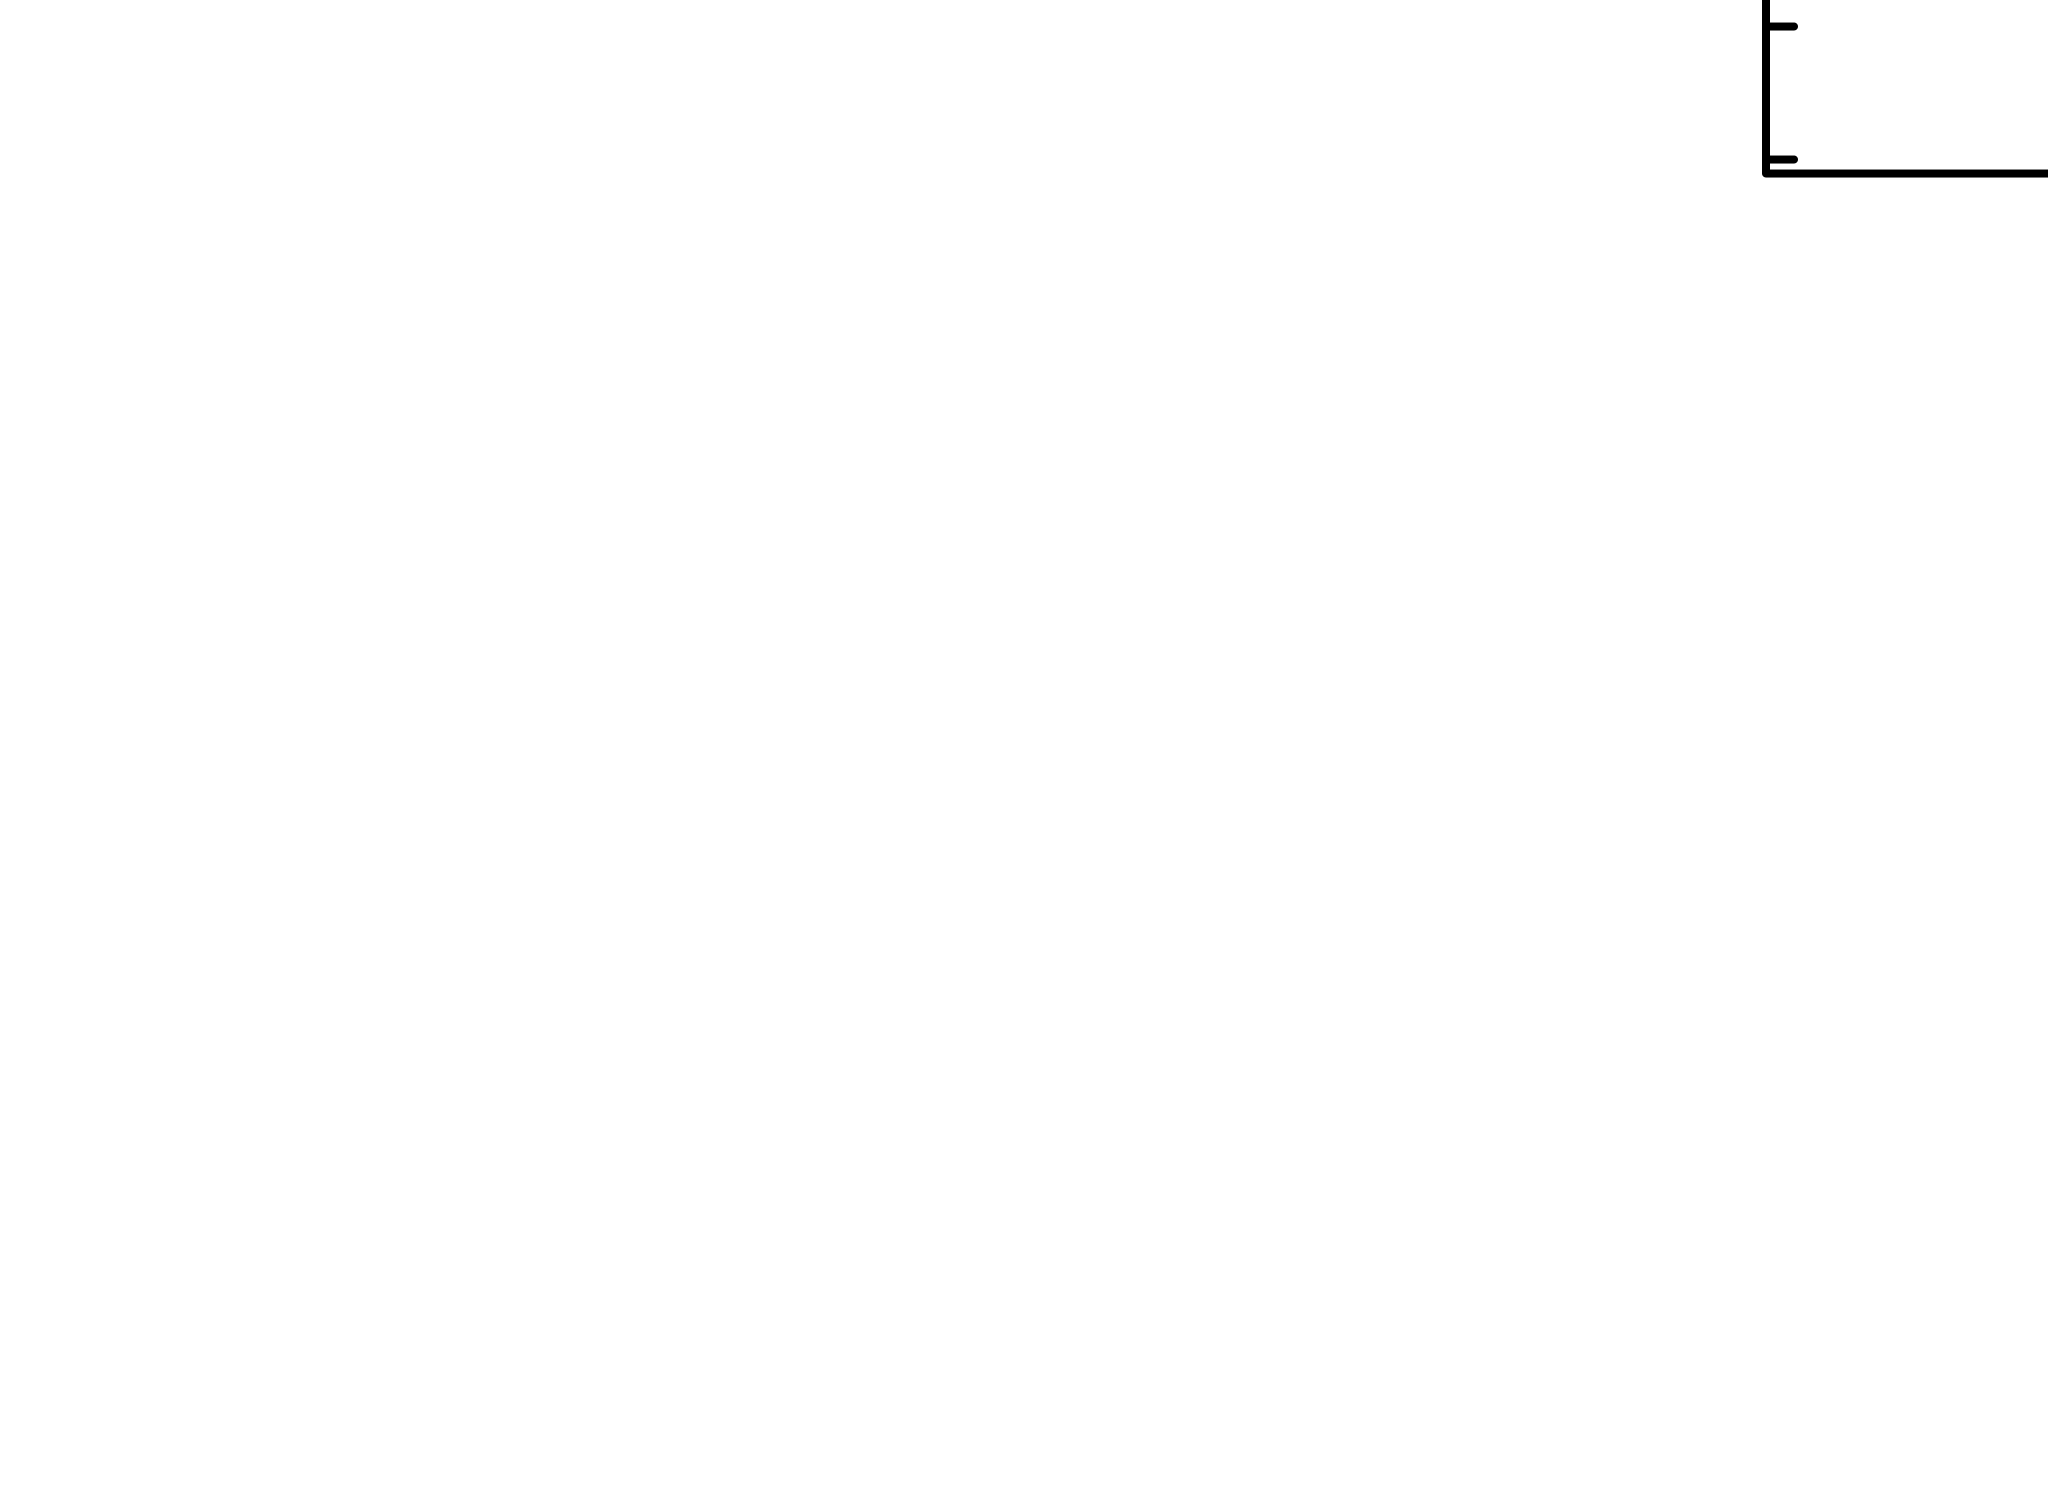

ing 41 bins.
 Null hypothesis probability of 0.000000e+00 with 33 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              3.401996e+13     using 41 bins.

Test statistic : Chi-Squared              3.401996e+13     using 41 bins.
 Null hypothesis probability of 0.000000e+00 with 33 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              3.248886e+13     using 41 bins.

Test statistic : Chi-Squared              3.248886e+13     using 41 bins.
 Null hypothesis probability of 0.000000e+00 with 33 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              3.246348e+13     using 41 bins.

Test statistic : Chi-Squared              3.246348e+13     using 41 bins.
 Null hypothesis probability of 0.000000e+00 with 33 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              3.246348e+13     using 41 bins.

Test statistic : Chi-Squa

In [16]:
AllModels.clear()
mo = Model("tbabs*(powerlaw+bbody+gaussian)")
mo.bbody.kT = 0.5
mo.powerlaw.PhoIndex  = 2.0
mo.gaussian.LineE = 6.7
mo.gaussian.LineE.frozen = True
Fit.perform()
Plot("data resid")